In [6]:
import pandas as pd
df=pd.read_csv("minwage.csv",encoding="latin")
df.to_csv("mwd.csv",encoding="utf-8")
df=pd.read_csv("mwd.csv")
df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [14]:
gb=df.groupby("State")
gb.get_group("Alabama").set_index("Year").head()

,Unnamed: 0,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,,
1968,0,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
1969,55,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
1970,110,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
1971,165,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
1972,220,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


In [18]:
act_min =pd.DataFrame()
for name,group in df.groupby("State"):
    if act_min.empty:
     
        act_min= group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name})
    else:
        
        act_min= act_min.join(group.set_index("Year")[["Low.2018"]].rename(columns={"Low.2018":name}))
        
    
act_min.head()       
        

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [40]:
act_min =pd.DataFrame()
for name,group in df.groupby("State"):
    if act_min.empty:
     
        act_min= group.set_index("Year")[["High.2018"]].rename(columns={"High.2018":name})
    else:
        
        act_min= act_min.join(group.set_index("Year")[["High.2018"]]).rename(columns={"High.2018":name})
        
    
act_min.head()  


,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,4.75,1.12,11.88,9.00,10.08,9.00,10.08,11.52,...,0.0,0.00,NaN,8.28,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,4.51,1.07,11.26,8.53,9.56,8.53,9.56,10.92,...,0.0,0.00,NaN,7.85,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,4.26,7.09,10.64,8.06,10.32,8.06,12.90,10.32,...,0.0,0.00,NaN,7.42,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,4.08,6.80,10.20,7.73,9.89,7.73,12.37,9.89,...,0.0,0.00,NaN,7.11,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,3.95,7.19,9.88,7.49,11.08,9.58,13.47,9.58,...,0.0,8.38,NaN,8.08,9.58,0.0,9.58,7.19,8.68,8.98


In [26]:
act_min.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.00000,...,50.0,50.000000,39.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,9.583800,2.500600,6.781600,8.632800,6.691800,8.848400,7.498800,9.72800,8.00000,...,0.0,5.541200,7.547692,7.165600,8.657400,5.897400,8.326600,7.166400,7.694200,5.149200
std,0.0,1.845176,3.530273,1.341223,1.187508,1.495979,1.036049,1.265436,1.46308,1.22897,...,0.0,2.202229,0.926903,0.716329,0.984647,2.726151,1.881944,0.793673,0.762675,1.998928
min,0.0,7.380000,0.000000,1.070000,6.420000,4.190000,6.820000,4.410000,6.98000,6.22000,...,0.0,0.000000,5.780000,5.270000,6.800000,0.000000,4.410000,5.580000,6.420000,2.260000
25%,0.0,8.252500,0.000000,6.522500,7.695000,5.260000,7.865000,7.015000,8.70750,7.17250,...,0.0,4.762500,7.040000,6.785000,7.800000,5.892500,7.227500,6.630000,7.107500,3.270000
50%,0.0,8.890000,0.000000,6.920000,8.670000,6.715000,9.075000,7.845000,9.44000,7.65500,...,0.0,6.070000,7.560000,7.230000,8.885000,6.855000,9.205000,7.075000,7.580000,5.445000
75%,0.0,10.492500,4.447500,7.290000,9.307500,8.135000,9.477500,8.327500,10.44000,8.62250,...,0.0,7.105000,8.065000,7.655000,9.372500,7.620000,9.777500,7.612500,8.145000,6.607500
max,0.0,15.120000,10.220000,8.680000,11.880000,9.500000,11.080000,9.580000,13.47000,11.52000,...,0.0,8.380000,10.010000,8.450000,10.320000,8.800000,11.520000,9.130000,9.660000,8.980000


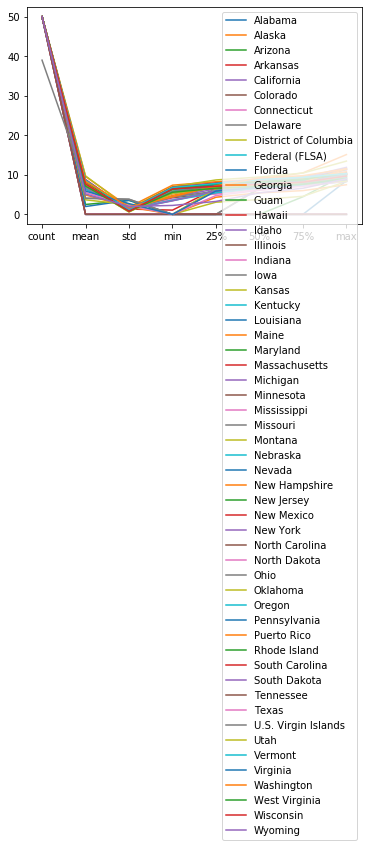

In [31]:
act_min.describe().plot()

In [32]:
act_min.corr().head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,NaN,1.000000,0.112159,-0.377934,0.717653,0.201963,0.699115,0.258997,0.673489,0.901026,...,NaN,-0.522472,0.518713,0.387844,0.663558,-0.601640,0.423212,0.044814,0.702570,0.727932
Arizona,NaN,0.112159,1.000000,0.018024,0.556224,0.774318,0.486908,0.464161,0.245736,0.068183,...,NaN,0.310952,0.067718,0.378509,0.548177,-0.068646,0.606844,0.536635,0.164838,0.422853
Arkansas,NaN,-0.377934,0.018024,1.000000,-0.234367,-0.042403,0.066554,0.016125,0.143713,-0.335254,...,NaN,0.503242,0.166108,0.012765,0.087429,0.582192,-0.061071,0.420819,0.000470,-0.250592
California,NaN,0.717653,0.556224,-0.234367,1.000000,0.678058,0.858218,0.479197,0.457740,0.617172,...,NaN,-0.239533,0.165680,0.605122,0.877922,-0.326364,0.744626,0.371765,0.584067,0.722617


In [33]:
df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88


In [38]:
issue_df=df[df["Low.2018"]==0]
issue_df.head()

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
10,10,1968,Florida,...,NaN,0.0,0.0,34.783333,0.0,0.0
11,11,1968,Georgia,...,NaN,0.0,0.0,34.783333,0.0,0.0
15,15,1968,Illinois,...,NaN,0.0,0.0,34.783333,0.0,0.0
17,17,1968,Iowa,...,NaN,0.0,0.0,34.783333,0.0,0.0


In [35]:

issue_df["State"].unique()




array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

In [42]:
import numpy as np
act_min.replace(0,np.NaN).dropna(axis=1).corr().head()


,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,0.201963,0.699115,0.258997,0.673489,0.901026,0.787915,0.672620,...,0.610814,0.838675,0.652353,-0.294266,0.387844,0.663558,0.423212,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,-0.042403,0.066554,0.016125,0.143713,-0.335254,0.039593,0.204801,...,0.159923,-0.334207,0.003498,0.765024,0.012765,0.087429,-0.061071,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.678058,0.858218,0.479197,0.457740,0.617172,0.492052,0.519241,...,0.429061,0.487280,0.780916,0.002955,0.605122,0.877922,0.744626,0.371765,0.584067,0.722617
Colorado,0.201963,-0.042403,0.678058,1.000000,0.572078,0.727864,0.239137,0.127869,0.079973,0.292030,...,0.021233,0.095910,0.661957,0.266817,0.519295,0.610147,0.750629,0.481995,0.174696,0.414536
Connecticut,0.699115,0.066554,0.858218,0.572078,1.000000,0.560850,0.669779,0.563760,0.652939,0.659447,...,0.561204,0.479519,0.822384,0.153930,0.504585,0.908816,0.721482,0.429235,0.610449,0.823097


In [50]:
min_corr=act_min.replace(0,np.NaN).dropna(axis=1).corr().head()

for problems in issue_df["State"].unique():
    if problems in min_corr.columns:
        print("something missing..")
act_corr.head()        

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,0.201963,0.699115,0.258997,0.673489,0.901026,0.787915,0.672620,...,0.610814,0.838675,0.652353,-0.294266,0.387844,0.663558,0.423212,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,-0.042403,0.066554,0.016125,0.143713,-0.335254,0.039593,0.204801,...,0.159923,-0.334207,0.003498,0.765024,0.012765,0.087429,-0.061071,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.678058,0.858218,0.479197,0.457740,0.617172,0.492052,0.519241,...,0.429061,0.487280,0.780916,0.002955,0.605122,0.877922,0.744626,0.371765,0.584067,0.722617
Colorado,0.201963,-0.042403,0.678058,1.000000,0.572078,0.727864,0.239137,0.127869,0.079973,0.292030,...,0.021233,0.095910,0.661957,0.266817,0.519295,0.610147,0.750629,0.481995,0.174696,0.414536
Connecticut,0.699115,0.066554,0.858218,0.572078,1.000000,0.560850,0.669779,0.563760,0.652939,0.659447,...,0.561204,0.479519,0.822384,0.153930,0.504585,0.908816,0.721482,0.429235,0.610449,0.823097


In [45]:
grouped_issues=issue_df.groupby("State")

grouped_issues.get_group("Alabama").head()


,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
55,55,1969,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
110,110,1970,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
165,165,1971,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
220,220,1972,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


In [51]:
grouped_issues.get_group("Alabama")["Low.2018"].sum()

0.0

In [53]:
for state ,data in grouped_issues:
    if data["Low.2018"].sum()!=0.0:
        print("We missed something")